# Model Development

In this notebook, we will be developing predictive models using the `Telco Customer Churn` dataset. Using `sklearn` models: Logistic Regression, Decision Tree, and K-Nearest Neighbors; we will craft various classifiers as base models and then to optimize using the cost function, regularization and hyperparameter tuning.

By the end of this notebook, we will establish foundations for evaluating which model will perform best for predicting churn.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/encoded_telco_churn.csv')
df

,Male,Partner,Dependents,SeniorCitizen,DurationMonths,PhoneService,MultipleLines,NoInternet,DSLInternet,FiberOpticInternet,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyContract,AnnualContract,BiannualContract,AutoBankTransfer,AutoCreditCard,ElectronicCheck,MailedCheck,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,56.95,"1,889.50",0
2,1,0,0,0,2,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,42.30,"1,840.75",0
4,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,1,1,0,24,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,1,1,84.80,"1,990.50",0
7028,0,1,1,0,72,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,103.20,"7,362.90",0
7029,0,1,1,0,11,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,29.60,346.45,0
7030,1,1,0,1,4,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,74.40,306.60,1


In [90]:
log_reg = LogisticRegression()

In [91]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict(X_test)

In [94]:
base_accuracy = accuracy_score(y_test, y_pred)
base_confmtrx = confusion_matrix(y_test, y_pred)
base_clasrprt = classification_report(y_test, y_pred)

print(f'Accuracy: {base_accuracy}')
print('Confusion Matrix:')
print(base_confmtrx)
print('Classification Report:')
print(base_clasrprt)
print(log_loss(y_pred, y_pred_proba))

Accuracy: 0.7874911158493249
Confusion Matrix:
[[917 116]
 [183 191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

2.2204460492503136e-16


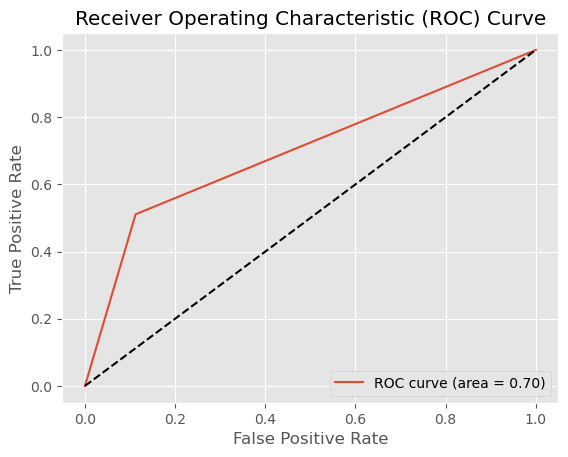

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

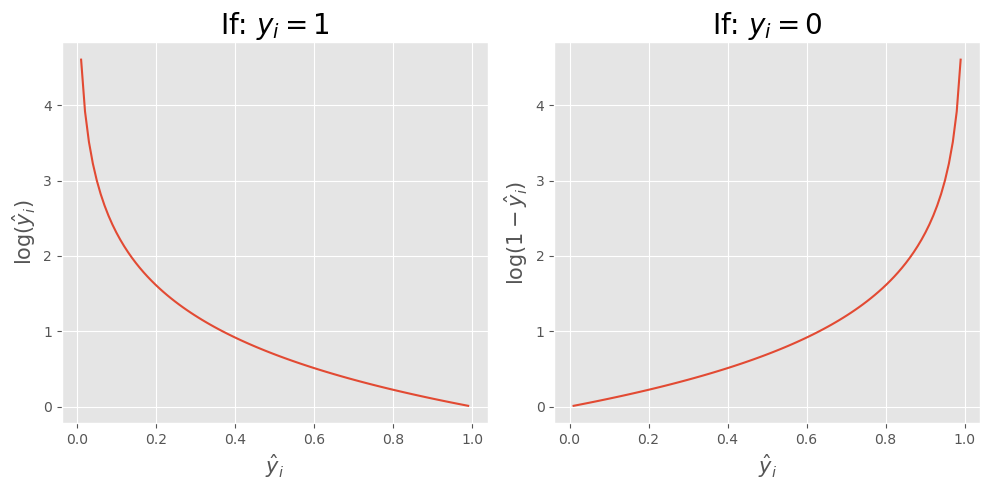

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
epsilon = 1e-2
yhat = np.linspace(epsilon, 1-epsilon, 100)  # probability must range between 0 and 1
ax[0].plot(yhat, -np.log(yhat))
ax[0].set_title(r'If: $y_i = 1$', size=20)
ax[0].set_xlabel(r'$\hat{y}_i$', size=15)
ax[0].set_ylabel(r'$\log(\hat{y}_i)$', size=15)

ax[1].plot(yhat, -np.log(1 - yhat))
ax[1].set_ylabel(r'$\log(1 - \hat{y}_i)$', size=15)
ax[1].set_title(r'If: $y_i = 0$', size=20)
ax[1].set_xlabel(r'$\hat{y}_i$', size=15)
plt.tight_layout()
plt.show()

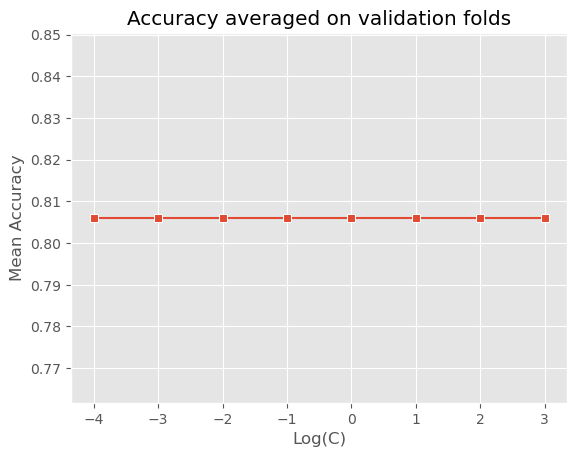

In [97]:
C_list = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]
cv_scores = []
cv_scores_std = []

for c in C_list:
    logreg = LogisticRegression(C=c, max_iter=1000)
    cv_scores.append(np.mean(scores['test_score']))
    cv_scores_std.append(np.std(scores['test_score']))

fig, ax = plt.subplots()
sns.lineplot(x=np.log10(C_list), y=cv_scores, marker='s', ax=ax)
ax.set_xlabel('Log(C)')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy averaged on validation folds')
plt.show()


In [98]:
logreg_best = LogisticRegression(C=1, max_iter=1000)
logreg_best.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=1000)

In [99]:
# Model Evaluation
y_pred = logreg_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred_proba = logreg_best.predict_proba(X_test)
log_loss_value = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Log Loss: {log_loss_value}")

Accuracy: 0.7874911158493249
Log Loss: 0.4318164419643953


In [100]:
try:
    print('Script Executed Successfully')
except:
    print('FAILED')

Script Executed Successfully


In [101]:
log_reg.score(X_test, y_test)

0.7874911158493249

In [102]:
accuracy_score(y_test, y_pred)

0.7874911158493249

# New Model